In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering

In [79]:
cog = pd.read_csv('cognitive_test.csv',sep=',').dropna()
csf = pd.read_csv('CSF.csv',sep=',').dropna()
MRI = pd.read_csv('MRI.csv',sep=',').dropna()

In [3]:
cog

,ADNI_MEM,ADNI_EF,y
0,0.506,-0.060,0
1,-0.831,-1.119,1
2,0.574,0.136,0
3,-1.296,-2.448,1
4,1.440,1.086,0
5,-0.801,-0.457,1
6,0.826,-0.213,0
7,1.371,1.671,0
8,0.513,0.472,0
9,1.931,1.928,0


In [4]:
csf


,LOGABETA,LOGTAU,LOGPTAU,LOGPTAU/ABETA,LOGTAU/ABETA,y
0,2.870111,2.379668,1.358506,-1.511605,-0.490443,1
1,2.738225,2.527630,1.524136,-1.214089,-0.210596,0
2,3.555336,2.643650,1.574147,-1.981189,-0.911686,0
3,2.553155,2.518382,1.494989,-1.058166,-0.034772,1
4,3.199206,2.308778,1.222196,-1.977010,-0.890429,0
5,2.740836,2.231724,1.200850,-1.539986,-0.509112,0
6,3.266702,2.329805,1.256477,-2.010225,-0.936897,0
7,3.387034,2.422754,1.339451,-2.047582,-0.964280,0
8,3.216694,2.257918,1.223755,-1.992938,-0.958775,0
9,2.646306,2.423574,1.435207,-1.211099,-0.222732,1


In [5]:
MRI


,BL_Thick_EntCtx,BL_HippVol,BL_ICV,y
0,3.4780,3997.00,1975263.446,0
1,1.9930,2760.25,1906906.237,1
2,3.3990,3372.00,1646682.247,0
3,2.3988,3328.25,1344058.010,1
4,3.1303,2865.75,1392431.618,0
5,3.3980,2574.25,1474173.726,1
6,3.5583,3404.75,1266358.893,0
7,3.8690,3323.75,1488637.242,0
8,3.4285,3505.00,1345686.943,0
9,3.3595,3259.75,1405562.586,0


Text(0,0.5,'ADNI_EF')

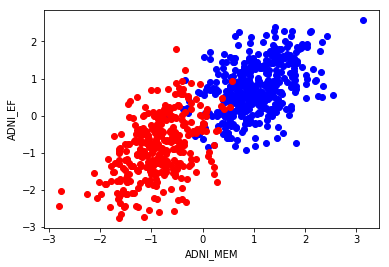

In [6]:
CN = cog[cog['y'] == 0][['ADNI_MEM','ADNI_EF']]
AD = cog[cog['y'] == 1][['ADNI_MEM','ADNI_EF']]
plt.plot(CN['ADNI_MEM'],CN['ADNI_EF'],'bo')
plt.plot(AD['ADNI_MEM'],AD['ADNI_EF'],'ro')
plt.xlabel('ADNI_MEM')
plt.ylabel('ADNI_EF')

Text(0,0.5,'HippVol')

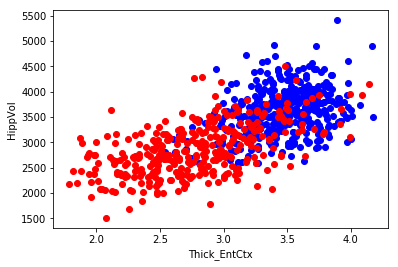

In [7]:
CN = MRI[MRI['y'] == 0][['BL_Thick_EntCtx','BL_HippVol']]
AD = MRI[MRI['y'] == 1][['BL_Thick_EntCtx','BL_HippVol']]
plt.plot(CN['BL_Thick_EntCtx'],CN['BL_HippVol'],'bo')
plt.plot(AD['BL_Thick_EntCtx'],AD['BL_HippVol'],'ro')
plt.xlabel('Thick_EntCtx')
plt.ylabel('HippVol')


Text(0,0.5,'ICV')

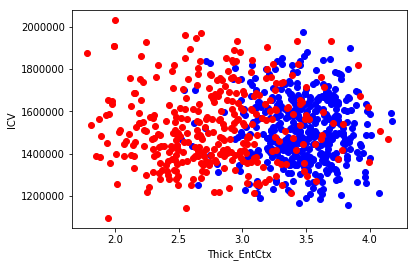

In [15]:
CN = MRI[MRI['y'] == 0][['BL_Thick_EntCtx','BL_ICV']]
AD = MRI[MRI['y'] == 1][['BL_Thick_EntCtx','BL_ICV']]
plt.plot(CN['BL_Thick_EntCtx'],CN['BL_ICV'],'bo')
plt.plot(AD['BL_Thick_EntCtx'],AD['BL_ICV'],'ro')
plt.xlabel('Thick_EntCtx')
plt.ylabel('ICV')


In [73]:
X = MRI[['BL_Thick_EntCtx','BL_HippVol','BL_ICV']]

pca = PCA(n_components=2)
transformed_X = pca.fit_transform(X)

transformed_X = pd.DataFrame(transformed_X)
transformed_X.columns = ['C1','C2']
transformed_X.index = MRI.index

CN = transformed_X[MRI['y'] == 0]
AD = transformed_X[MRI['y'] == 1]


Text(0,0.5,'C2')

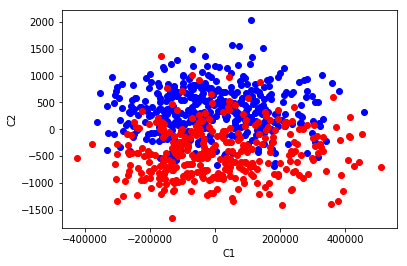

In [74]:
plt.plot(CN['C1'],CN['C2'],'bo')
plt.plot(AD['C1'],AD["C2"],'ro')
plt.xlabel('C1')
plt.ylabel('C2')

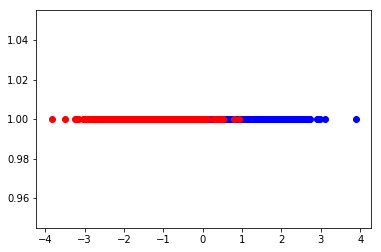

In [71]:
X = cog[['ADNI_MEM','ADNI_EF']]
pca = PCA(n_components=1)
transformed_X = pca.fit_transform(X)

transformed_X = pd.DataFrame(transformed_X)
transformed_X.columns = ['C1']
transformed_X.index = cog.index


CN = transformed_X[cog['y'] == 0]
AD = transformed_X[cog['y'] == 1]

plt.plot(CN['C1'],[1] * len(CN),'bo')
plt.plot(AD['C1'],[1] * len(AD),'ro')


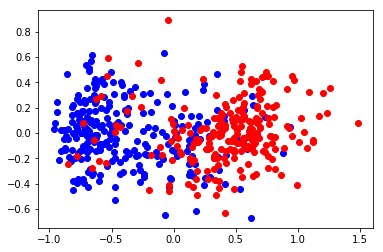

In [81]:
X = csf[['LOGABETA', 'LOGTAU', 'LOGPTAU', 'LOGPTAU/ABETA', 'LOGTAU/ABETA']]
pca = PCA(n_components=2)
transformed_X = pca.fit_transform(X)

transformed_X = pd.DataFrame(transformed_X)
transformed_X.columns = ['C1','C2']
transformed_X.index = csf.index

CN = transformed_X[csf['y'] == 0]
AD = transformed_X[csf['y'] == 1]

plt.plot(CN['C1'],CN['C2'],'bo')
plt.plot(AD['C1'],AD['C2'],'ro')


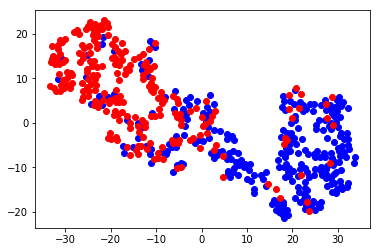

In [86]:
X = csf[['LOGABETA', 'LOGTAU', 'LOGPTAU', 'LOGPTAU/ABETA', 'LOGTAU/ABETA']]
tsne = TSNE(n_components=2)
transformed_X = tsne.fit_transform(X)

transformed_X = pd.DataFrame(transformed_X)
transformed_X.columns = ['C1','C2']
transformed_X.index = csf.index

CN = transformed_X[csf['y'] == 0]
AD = transformed_X[csf['y'] == 1]

plt.plot(CN['C1'],CN['C2'],'bo')
plt.plot(AD['C1'],AD['C2'],'ro')


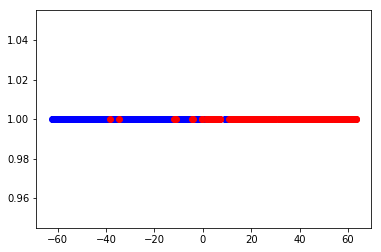

In [87]:
X = cog[['ADNI_MEM','ADNI_EF']]
tsne = TSNE(n_components=1)
transformed_X = tsne.fit_transform(X)

transformed_X = pd.DataFrame(transformed_X)
transformed_X.columns = ['C1']
transformed_X.index = cog.index


CN = transformed_X[cog['y'] == 0]
AD = transformed_X[cog['y'] == 1]

plt.plot(CN['C1'],[1] * len(CN),'bo')
plt.plot(AD['C1'],[1] * len(AD),'ro')


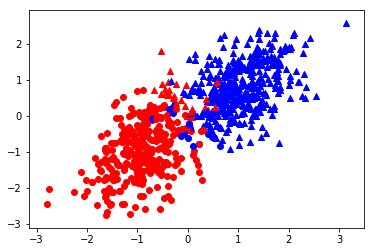

In [94]:
X = cog[['ADNI_MEM','ADNI_EF']]

kmeans = KMeans(n_clusters=2).fit(X)
labels = kmeans.labels_

for i in range(len(X)):
    if labels[i] == 0:
        m= '^'
    else:
        m= 'o'
    
    if cog.iloc[i]['y'] == 0:
        c = 'b'
    else:
        c = 'r'
    plt.scatter(X.iloc[i]['ADNI_MEM'], X.iloc[i]['ADNI_EF'], marker=m, color=c)
    
plt.show()

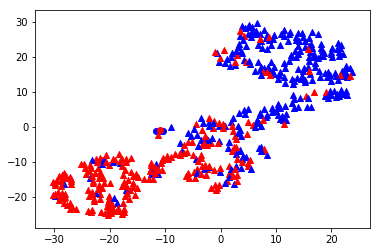

In [100]:
X = csf[['LOGABETA', 'LOGTAU', 'LOGPTAU', 'LOGPTAU/ABETA', 'LOGTAU/ABETA']]
tsne = TSNE(n_components=2)
transformed_X = tsne.fit_transform(X)

transformed_X = pd.DataFrame(transformed_X)
transformed_X.columns = ['C1','C2']
transformed_X.index = csf.index


kmeans = SpectralClustering(n_clusters=2).fit(transformed_X)
labels = kmeans.labels_

for i in range(len(transformed_X)):
    if labels[i] == 0:
        m= '^'
    else:
        m= 'o'
    
    if csf.iloc[i]['y'] == 0:
        c = 'b'
    else:
        c = 'r'
    plt.scatter(transformed_X.iloc[i]['C1'], transformed_X.iloc[i]['C2'], marker=m, color=c)
    
plt.show()